    ## Page meteo

float64
     Temps (ms)   Température (°C)   Humidité (%)   Pression (hPa)  \
41        46469               5.34          57.70           993.80   
42        47555               5.26          57.70           993.93   
43        48641               5.16          57.74           994.05   
44        49730               5.09          57.90           994.15   
45        50816               5.01          58.77           994.28   
..          ...                ...            ...              ...   
727      793245               3.98          66.30           995.08   
728      794336               4.00          66.43           995.05   
729      795427               3.99          66.42           995.05   
730      796518               3.97          66.09           994.93   
731      797609               3.99          66.37           994.90   

      TVOC (ppb)   eCO2 (ppm)   Latitude   Longitude  
41             0          400  48.845855    2.605117  
42             0          400  48.845866 

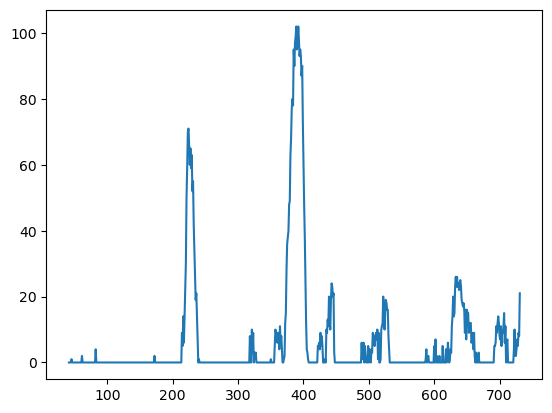

In [49]:
print(df[" Latitude"].dtype)
print(df)
plt.plot(df[' TVOC (ppb)'])

In [58]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import os
print(os.getcwd())
#file_path = "meteo/resultats_2025-02-02_08-44-57.csv"
file_path = "data_2.txt"
import ipywidgets as widgets

# Lire toutes les lignes du fichier CSV
df_raw = pd.read_csv(file_path)#, lineterminator='\n')
#with open(file_path, 'r') as f:
#    lines = f.readlines()
#lines = lines[:-1]
#from io import StringIO
#df_raw = pd.read_csv(StringIO(''.join(lines)), lineterminator='\n')
# Liste pour stocker les données traitées

# Créer un DataFrame à partir des données extraites
#print(df_raw.columns)
#print(df_raw.get(" Latitude", "Colonne non trouvée"))
df=df_raw[df_raw[" Latitude"] != 0] 

#print(df)
choix=widgets.RadioButtons(
    options=df.columns[1:6].tolist(),
    value=' eCO2 (ppm)', 
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Affichage :',
    disabled=False
)

# Sauvegarder le DataFrame dans un nouveau fichier CSV si besoin
df.to_csv(file_path.split(".")[0]+"_traites.csv", index=False)


####temperature,humidity,TempBME,Pression,co2,voc

display(choix)

from IPython.display import display
button = widgets.Button(description="Calcul carte")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")
        colonnes = [" Latitude", " Longitude", choix.value]  # Remplace avec tes colonnes
        heatmap = df[colonnes].values.tolist()
        

        m=folium.Map(
            [df[" Latitude"].iloc[0], df[" Longitude"].iloc[0]],#location=(-38.625, -12.875),
            control_scale=True,
            zoom_start=15,
        )

        HeatMap(heatmap).add_to(m)
        display(m)
        # Sauvegarder la carte dans un fichier HTML
        m.save("map_"+choix.value+".html")
        #['Timestamp', 'Latitude', 'Longitude', 'Temperature', 'Humidity','TempBME', 'Pression', 'CO2', 'VOC']
        #plt.plot(df["Pression"])
button.on_click(on_button_clicked)

C:\Users\kohle\Documents\Arduino\MiniB4A_new


RadioButtons(description='Affichage :', index=4, options=(' Température (°C)', ' Humidité (%)', ' Pression (hP…

Button(description='Calcul carte', style=ButtonStyle())

Output()

In [29]:


heatmap  = []

m=folium.Map(
    [latitude, longitude],#location=(-38.625, -12.875),
    control_scale=True,
    zoom_start=15,
)

for i in range(len(df)):
    try:
        # Obtenir les valeurs pour chaque ligne
        lat = float(df.iloc[i][' Latitude'])
        lon = float(df.iloc[i][' Longitude'])
        voc = float(df.iloc[i]['VOC'])
        co2 = float(df.iloc[i]['CO2'])
        temperature = float(df.iloc[i]['Temperature'].split("°")[0])
        humidity = float(df.iloc[i]['Humidity'].split("%")[0])
        TempBME = float(df.iloc[i]['TempBME'].split("°")[0])
        pression = float(df.iloc[i]['Pression'].split(" hPa")[0])
           
        heatmap.append([lat,lon,co2])
        
        
        if choix.value == "CO2":
            radius=co2/10
            color="r"
            heatmap_z=co2
        if choix.value == "VOC":
            radius=voc
            color="g"
            heatmap_z=voc
        if choix.value == "Temperature":
            radius=temperature
            color="blue"
            heatmap_z=temperature
        if choix.value == "Humidity":
            radius=humidity/2
            color="orange"
            heatmap_z=humidity
        if choix.value == "TempBME":
            radius=TempBME
            color="black"
            heatmap_z=TempBME
        if choix.value == "Pression":
            radius=pression/100
            color="purple"
            heatmap_z=pression
        heatmap.append([lat,lon,heatmap_z])
        # Ajouter un cercle à la carte
        #folium.Circle(
            #location=[lat, lon],
             
            #radius=radius,#float(df.iloc[i][choix.value]),#co2/10,  # Rayon en mètres
            
            #color=color,  # Couleur de la bordure
            #fill=True,  # Remplir le cercle
            #fill_color=color,  # Couleur de remplissage
            #fill_opacity=0.5,  # Opacité du remplissage
        #).add_to(m)
    except Exception as e:
        print(f"Erreur pour l'index {i}: {e}")
#heatmap=[lat_all,lon_all,heatmap_z]
heatmap_map = [list(t) for t in zip(*heatmap)]
HeatMap(heatmap).add_to(m)

display(m)
# Sauvegarder la carte dans un fichier HTML
m.save("map_"+choix.value+file_path.split(".")[0].split("resultats")[1]+".html")


NameError: name 'latitude' is not defined

In [3]:
print(df_brut.columns)

Index(['Timestamp', 'Latitude', 'Longitude', 'Temperature', 'Humidity',
       'TempBME', 'Pression', 'CO2', 'VOC'],
      dtype='object')
